<a href="https://colab.research.google.com/github/Kevin610-cpu/FDSFE_KCarter/blob/main/HW8/Kevin_NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# how many labels are available?
y_train.shape

(60000,)

In [5]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

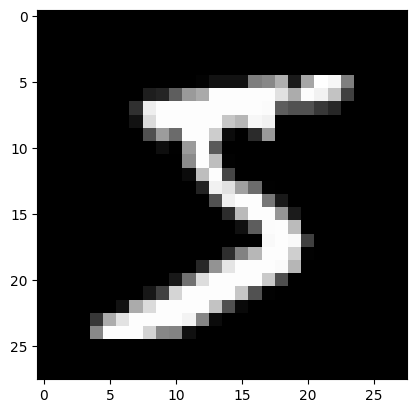

In [6]:
# show the first input data object

plt.imshow(x_train[0], cmap='gray')

In [7]:
# check how many possible values are in the target variable
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [9]:
# check what is the minimum and maximum value and data type of the features dataset
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

In [10]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
x_train = x_train/255.
x_test = x_test/255.


In [11]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [12]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [13]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

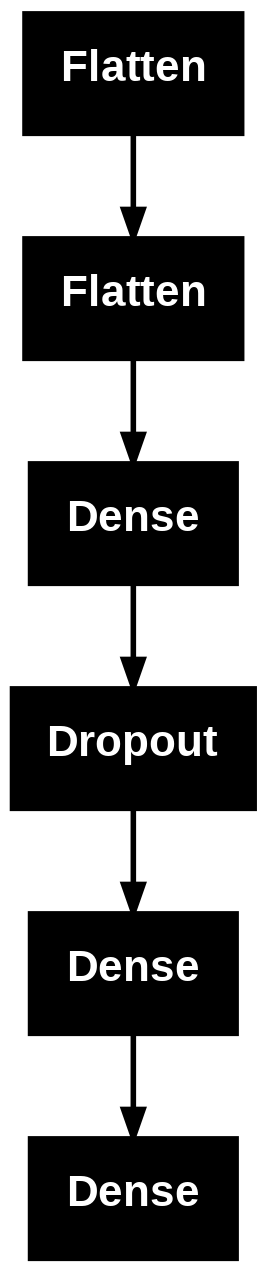

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500, validation_split=0.1)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1689 - loss: 0.4277 - val_accuracy: 0.1733 - val_loss: 0.7047
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1694 - loss: 0.4305 - val_accuracy: 0.1662 - val_loss: 0.6918
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1696 - loss: 0.4351 - val_accuracy: 0.1833 - val_loss: 0.6749
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1688 - loss: 0.4366 - val_accuracy: 0.1778 - val_loss: 0.6747
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1709 - loss: 0.4232 - val_accuracy: 0.1732 - val_loss: 0.6976
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1701 - loss: 0.4417 - val_accuracy: 0.1763 - val_loss: 0.6673
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1687 - loss: 0.4350 - val_accuracy: 0.1663 - val_loss: 0.6930
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1697 - loss: 0.4341 - val_

the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

In [18]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log') #use log scale for the y axis


NameError: name 'training_history' is not defined

In [ ]:
# is this model overfitting? how woudl you find out? how would you fix it?



Given that the validation loss stops getting better and begins to rise while the training loss keeps getting less, the model is indeed overfitting. This shows that the model is ineffective at generalizing to new data since it is learning to suit the training set too closely.


A way I would fix this is by reducing the amount of layers so that the data would be easier to memorize.

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it

model.evaluate(x_test, y_test)

In [ ]:
# show the first 5 data points and corresponding predictions

print(model.predict(x_test[:5])

In [ ]:
y_test[:5]

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer at the end, how many neurons?
# your code goes here
prob_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
prob_model.add(tf.keras.layers.Dropout(0.2))
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()
prob_model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer =tf.keras.optimizers.Adam()
prob_model.compile = model.compile(optimizer = optimizer, loss = loss,
              metrics=['accuracy'])
prob_training_history = model3.fit(x_train, y_train, epochs=500, validation_split=0.1)

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it

model.evaluate(x_test, y_test)

In [ ]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])

In [ ]:
#show the loss curves and comment
plt.plot(prob_training_history.history["loss"])
plt.plot(prob_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale("log") #use log scale for the y axis


The loss curves for training and validation are shown in this image. At first, both loses slowly go down, which means that learning is working. However, the validity loss starts to change and sometimes goes up, which is a sign of overfitting starting to happen. This behavior shows that the model is still learning from the training data, but it is getting worse at applying what it has learned to new data.




# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
YOUR CODE GOES HERE


In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = ...
optimizer = ...
prob_model.compile...
prob_training_history = ...

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it

model.evaluate(x_test, y_test)

In [ ]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])

In [ ]:
#show the loss curves and comment
plt.plot(.....
plt.plot(.....
plt.xlabel(....
plt.ylabel(...
plt.yscale('log') #use log scale for the y axis
